---

<center><h1>Mnist Implementation from scratch<h1></center>

---

## Libraries

In [749]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data

In [748]:
#Mnist data base: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
data = pd.read_csv('mnist_train.csv')

In [750]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data)

#test
data_dev = data[0:1000].T
Y_dev = data_dev[0] #labels
X_dev = data_dev[1:n] #features
X_dev = X_dev / 255

#train
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [751]:
def plot_digit(dataset,index, fig=None, label=None, estimation=None):
    current_image = dataset[:, index, None]
    current_image
    current_image = current_image.reshape((28, 28)) * 255

    #only show if fig
    if (fig==None):
      plt.gray()
      plt.imshow(current_image, interpolation='nearest')
      plt.show()
    else:
      fig.imshow(current_image, interpolation='nearest')
      fig.set_title(f'Imagen {index}')
      fig.axis('off')


    #only show if test data
    if (estimation != None):
      fig.imshow(current_image, interpolation='nearest')
      fig.set_title(f'Prediction {estimation}, Value: {label}')
      fig.axis('off')


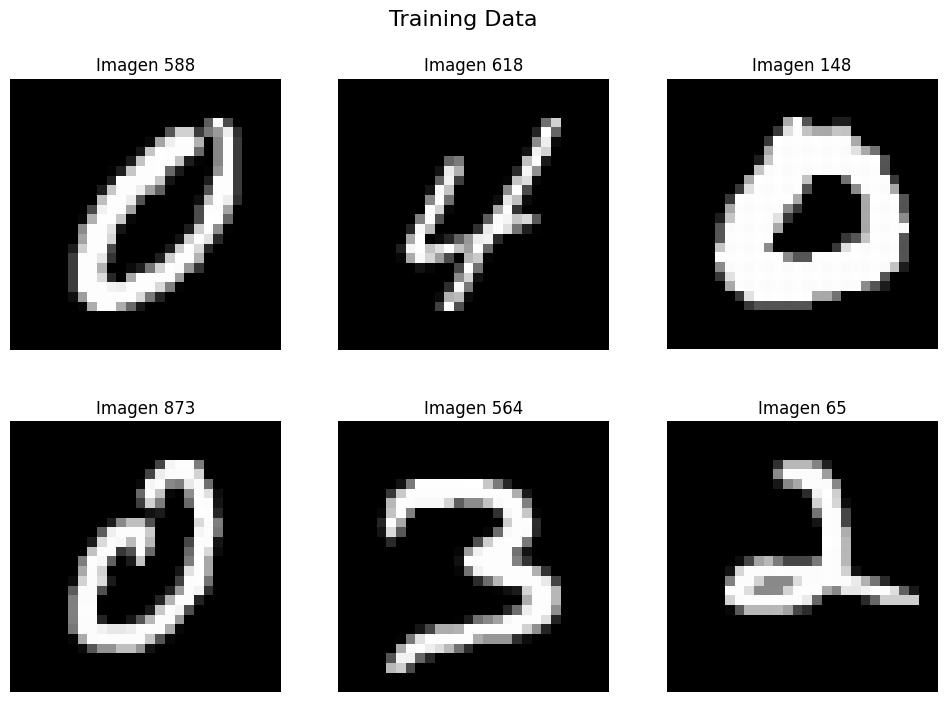

In [752]:
#Show some of the training data
grid_size=np.array([2,3])
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 7))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    plot_digit(X_train,np.random.randint(1, 1000),ax)

fig.suptitle("Training Data"+'\n',y=1.05, fontsize=16)
plt.show()

## Implementation

### Notation and Concepts

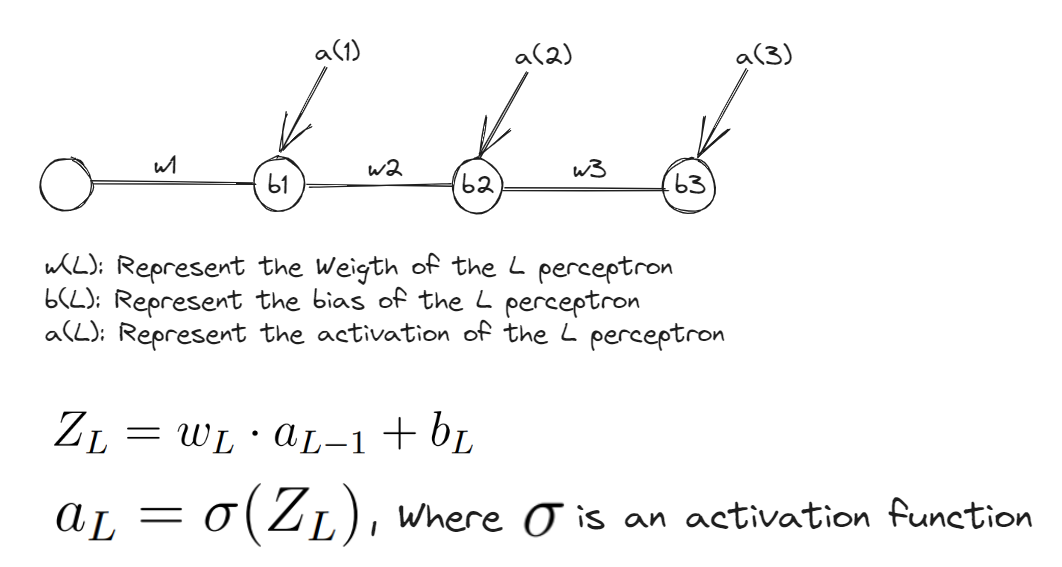

### Neuronal Network Desing



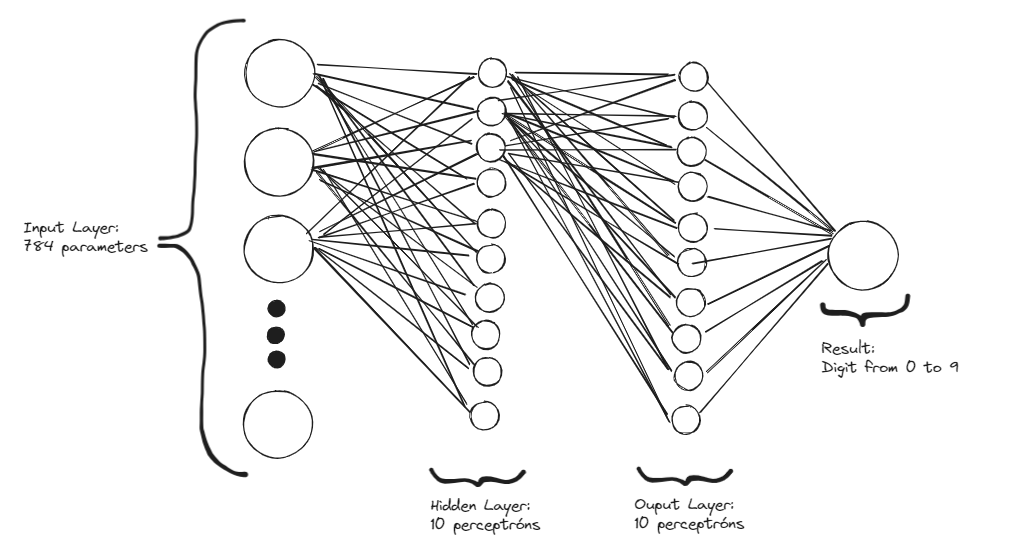

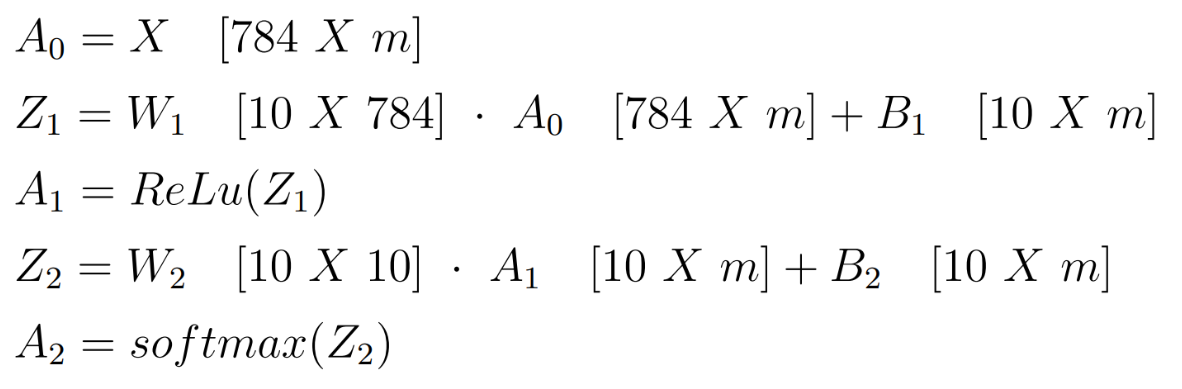

### Activation Functions

**ReLu**

ReLU (Rectified Linear Unit) is an activation function that maps any number to zero if it is negative, and otherwise maps it to itself. The ReLU function has been found to be very good for networks with many layers because it can prevent vanishing gradients when training deep networks.

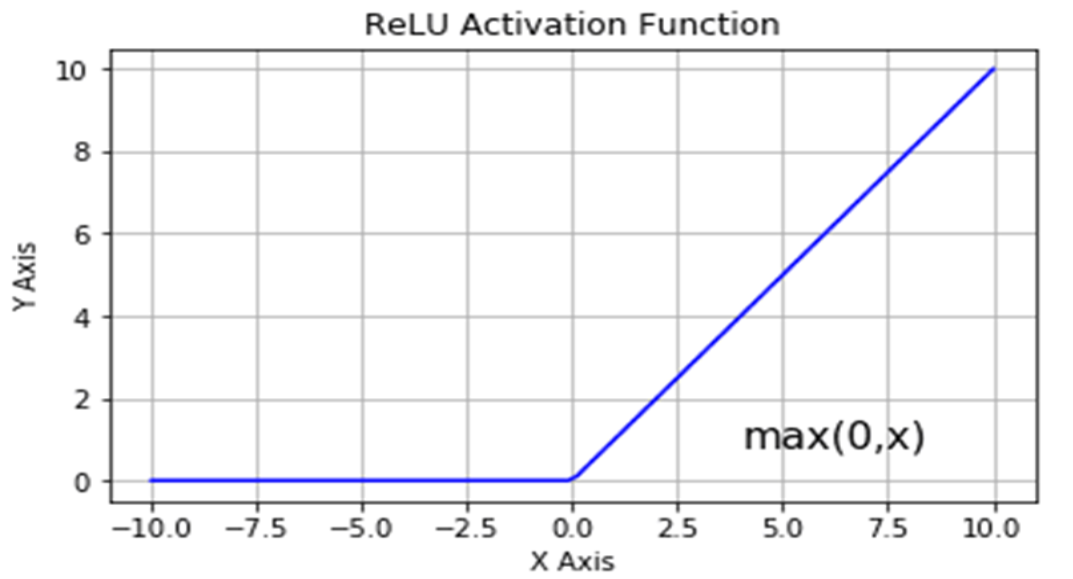

**Softmax**

Softmax is an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v ) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes

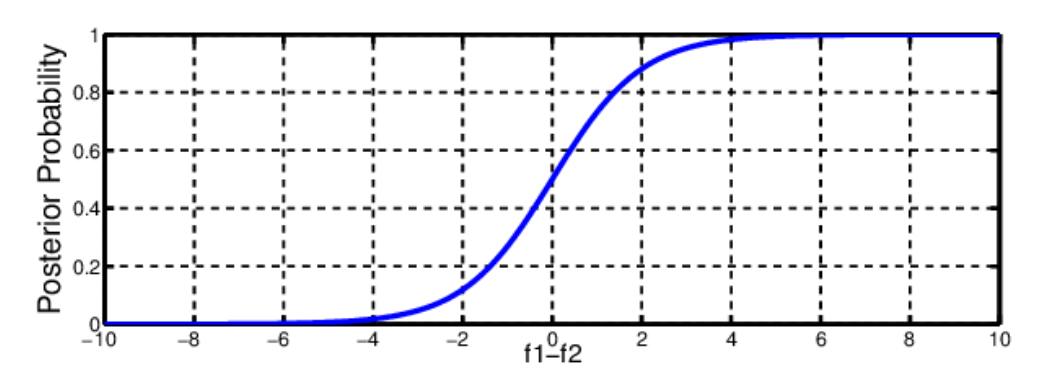



### Code

In [753]:
#activation functions
def ReLU(Z):
  return np.maximum(0,Z)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [754]:
#Params manage
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  m, n = dW2.shape
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1,b1,W2,b2


In [755]:
#one hot encoding
def one_hot(Y):
    Y=Y.astype(int)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [756]:
#fordward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [757]:
#backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [766]:
def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size
  def get_predictions(A2):
    return np.argmax(A2, 0)

In [772]:
# gradiant descent
def gradient_descent(X,Y,iterations,alpha):
  W1,b1,W2,b2 = init_params()

  for i in range (iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if (i % 10 == 0):
      print( "Iteration: ", i)
      print( "Accuracy: ", get_accuracy(get_predictions(A2),Y))

  return W1, b1, W2, b2

## Training

In [773]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 200, 0.1)

Iteration:  0
Accuracy:  0.0997457627118644
Iteration:  10
Accuracy:  0.20447457627118645
Iteration:  20
Accuracy:  0.329135593220339
Iteration:  30
Accuracy:  0.41015254237288135
Iteration:  40
Accuracy:  0.47116949152542376
Iteration:  50
Accuracy:  0.5236949152542373
Iteration:  60
Accuracy:  0.6522033898305085
Iteration:  70
Accuracy:  0.7222542372881356
Iteration:  80
Accuracy:  0.7507966101694915
Iteration:  90
Accuracy:  0.7692881355932203
Iteration:  100
Accuracy:  0.7842542372881356
Iteration:  110
Accuracy:  0.7969661016949152
Iteration:  120
Accuracy:  0.8066271186440678
Iteration:  130
Accuracy:  0.8158305084745763
Iteration:  140
Accuracy:  0.8228305084745763
Iteration:  150
Accuracy:  0.8291864406779661
Iteration:  160
Accuracy:  0.8349491525423729
Iteration:  170
Accuracy:  0.8396779661016949
Iteration:  180
Accuracy:  0.8447966101694915
Iteration:  190
Accuracy:  0.8493559322033898


## Testing

In [770]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#Show some of the training data


def test_prediction(W1, b1, W2, b2):
    grid_size=np.array([2,3])
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 7))
    fig.tight_layout()

    for i, ax in enumerate(axes.flat):
        index=np.random.randint(1, 1000)
        prediction = make_predictions(X_train[:, index,None], W1, b1, W2, b2)
        label = Y_train[index]
        plot_digit(X_train,index,ax,label,prediction)


    fig.suptitle("Result Test"+'\n',y=1.05, fontsize=16)
    plt.show()

    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    accuracy = get_accuracy(dev_predictions, Y_dev)
    print ("")
    print("Accuracy of:", accuracy)

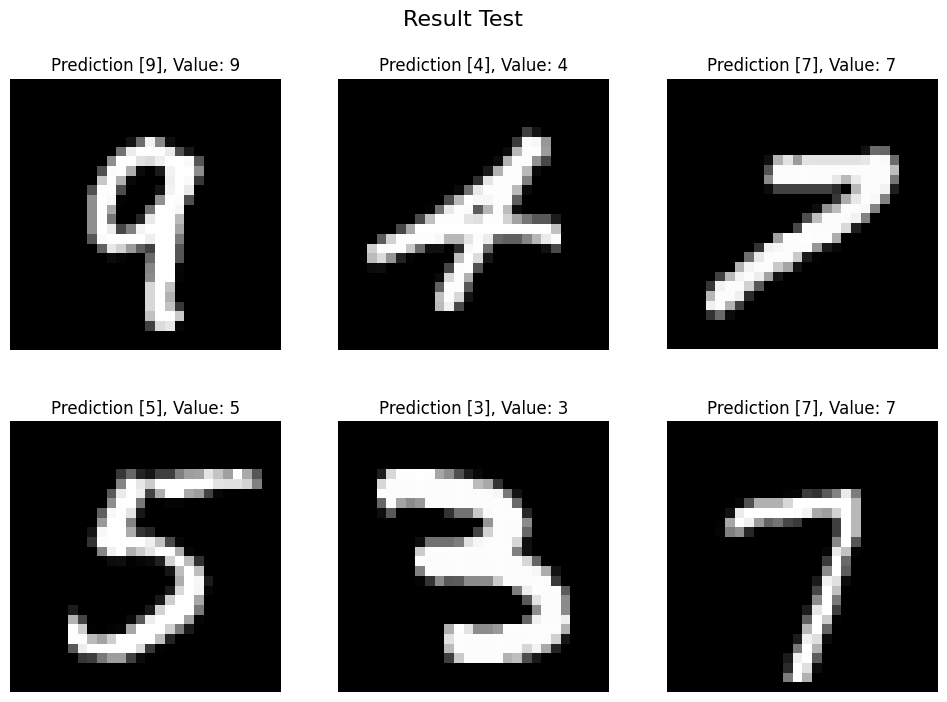


Accuracy of: 0.872


In [771]:
test_prediction(W1, b1, W2, b2)